# LOAN APPROVAL PREDICTION USING ML BASED MODELS

This notebook aims to predict whether a given customer's loan application should be approved or declined. Past loan applications data from the Train_data file is used to train the classifiers. This is an attempt to provide maximum accuracy to the prediction modedl and finally decide the status of Test_data file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import accuracy_score, roc_auc_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

### EXPLORATORY DATA ANALYSIS

In [2]:
df_train_data = pd.read_excel("Project - 4 - Train Data.xlsx")
df_test_data = pd.read_excel("Project - 4 - Test Data.xlsx")

In [3]:
df_train_data.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y


In [4]:
df_train_data.describe()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID
count,614.000000,614.000000,612.000000,600.00000,564.000000,6.140000e+02
mean,6484.151140,1945.494958,175.805882,342.00000,0.842199,5.055666e+09
std,7330.850008,3511.498043,102.606123,65.12041,0.364878,2.890445e+09
min,180.000000,0.000000,10.800000,12.00000,0.000000,1.788664e+07
25%,3453.000000,0.000000,120.000000,360.00000,1.000000,2.561243e+09
50%,4575.000000,1426.200000,153.600000,360.00000,1.000000,5.244783e+09
75%,6954.000000,2756.700000,200.700000,360.00000,1.000000,7.495052e+09
max,97200.000000,50000.400000,840.000000,480.00000,1.000000,9.989158e+09


### Therefore we can classify the dataset as:-

### Features - 
#### 1) Loanapp_ID
#### 2) Sex
#### 3) Marital Status
#### 4) first_name
#### 5) last_name
#### 6) email
#### 7) address
#### 8) Dependents
#### 9) Qual_var
#### 10) SE
#### 11) App_Income_1
#### 12) App_Income_2	
#### 13) CPL_Amount	
#### 14) CPL_Term	
#### 15) Credit_His	
#### 16) Prop_Area	
#### 17) INT_ID	
#### 18) Prev_ID	
#### 19) AGT_ID	

### Target - 
#### CPL_Status

In [5]:
#To preserve the dataset

df_train_copy = df_train_data.copy()
df_test_copy = df_test_data.copy()

### Dropping the obvious columns

In [6]:
df_train_data.drop(["first_name","last_name","email","address","INT_ID","Prev_ID","AGT_ID"],axis=1,inplace=True)
df_test_data.drop(["first_name","last_name","email","address","INT_ID","Prev_ID","AGT_ID"],axis=1,inplace=True)

In [7]:
df_train_data.shape

(614, 13)

In [8]:
df_train_data.head()

,Loanapp_ID,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status
0,CPL001002,M,N,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,Y
1,CPL001003,M,Y,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,N
2,CPL001005,M,Y,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,Y
3,CPL001006,M,Y,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,Y
4,CPL001008,M,N,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,Y


In [9]:
df_train_data.describe()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His
count,614.000000,614.000000,612.000000,600.00000,564.000000
mean,6484.151140,1945.494958,175.805882,342.00000,0.842199
std,7330.850008,3511.498043,102.606123,65.12041,0.364878
min,180.000000,0.000000,10.800000,12.00000,0.000000
25%,3453.000000,0.000000,120.000000,360.00000,1.000000
50%,4575.000000,1426.200000,153.600000,360.00000,1.000000
75%,6954.000000,2756.700000,200.700000,360.00000,1.000000
max,97200.000000,50000.400000,840.000000,480.00000,1.000000


### Visualizing the Data

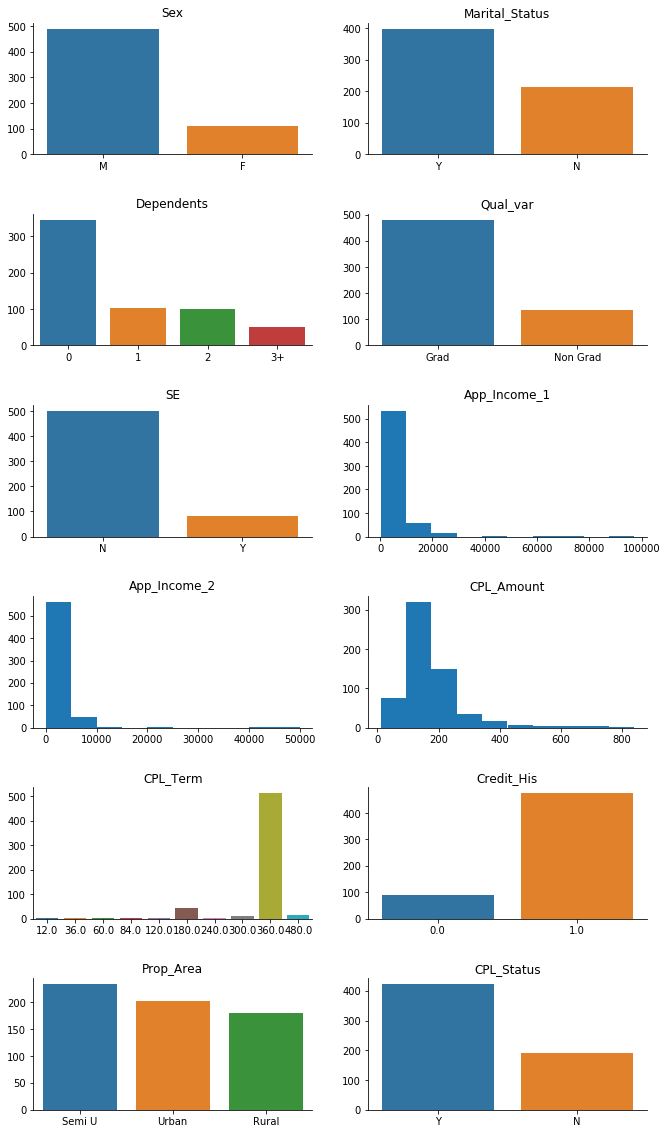

In [10]:
i, j = 0, 0
f, axes = plt.subplots(6, 2, figsize = (11, 20))
plt.subplots_adjust(hspace = .45)

for col in df_train_data.columns[1:]:
    if col in ['App_Income_1', 'App_Income_2', 'CPL_Amount']:
        axes[i,j].hist(df_train_data[col].dropna())
    else:
        bar_data = df_train_data[col].value_counts()
        sns.barplot(bar_data.index, bar_data.values, ax = axes[i,j])
    axes[i, j].set_title(col)
    axes[i, j].spines['top'].set_visible(False)
    axes[i, j].spines['right'].set_visible(False)
    j += 1 
    if j ==2:
        i += 1
        j = 0

### Dealing with the outliers

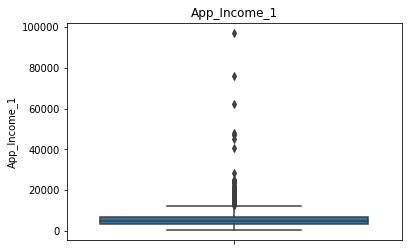

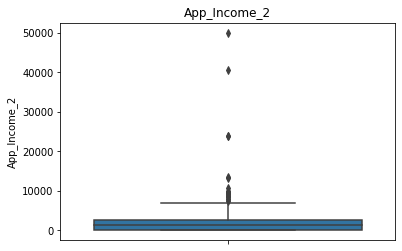

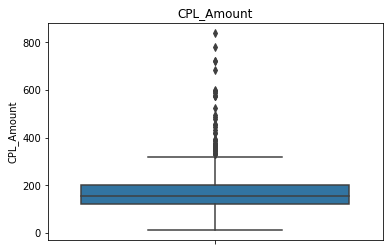

In [11]:
for col in ['App_Income_1', 'App_Income_2', 'CPL_Amount']:
    sns.boxplot(df_train_data[col].dropna(), orient = 'v')
    plt.title(col)
    plt.show()

In [12]:
df_train_data[df_train_data['App_Income_1'] > 18000].sort_values(by = 'App_Income_1')

,Loanapp_ID,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status
370,CPL002194,F,N,0,Grad,Y,18910.8,0.0,153.6,360.0,1.0,Semi U,Y
594,CPL002938,M,Y,0,Grad,Y,19344.0,0.0,260.0,360.0,1.0,Urban,Y
254,CPL001844,M,N,0,Grad,Y,19500.0,0.0,144.0,360.0,0.0,Urban,N
475,CPL002527,M,Y,2,Grad,Y,19830.0,1216.8,132.0,360.0,1.0,Rural,Y
572,CPL002855,M,Y,2,Grad,N,19999.2,0.0,350.4,360.0,1.0,Urban,Y
478,CPL002531,M,Y,1,Grad,Y,20000.4,2700.0,126.0,360.0,1.0,Semi U,Y
467,CPL002501,NaN,Y,0,Grad,N,20030.4,0.0,295.2,360.0,1.0,Semi U,Y
493,CPL002582,F,N,0,Non Grad,Y,20715.6,0.0,120.0,360.0,1.0,Semi U,Y
525,CPL002699,M,Y,2,Grad,Y,21000.0,0.0,153.6,360.0,1.0,Rural,Y
534,CPL002731,F,N,0,Non Grad,Y,21798.0,0.0,158.4,360.0,1.0,Urban,Y


In [13]:
print(df_train_data[df_train_data['App_Income_1'] == df_train_data['App_Income_1'].max()]) 

    Loanapp_ID Sex Marital_Status Dependents Qual_var SE  App_Income_1  \
409  CPL002317   M              Y         3+     Grad  N       97200.0   

     App_Income_2  CPL_Amount  CPL_Term  Credit_His Prop_Area CPL_Status  
409           0.0       132.0     360.0         0.0     Rural          N  


#### Dropping an outlier
Here we se that the application number 409 with ID CPL002317 is rejected despite having a large income, infact the largest income in the dataset and with zero credit history. This is a strak contrast to the dataset and therefore has a high chance of being wrongly provided data. Therefore it's dropped from the dataframe.

In [14]:
df_train_data = df_train_data.drop(409)

In [15]:
df_train_data.shape

(613, 13)

In [16]:
df_train_data[df_train_data['CPL_Amount']>400].sort_values(by = 'App_Income_1')

,Loanapp_ID,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status
418,CPL002345,M,Y,0,Grad,N,1230.0,3327.6,486.0,360.0,1.0,Rural,Y
147,CPL001518,M,Y,1,Grad,N,1845.6,1710.0,720.0,360.0,1.0,Urban,Y
122,CPL001431,F,N,0,Grad,N,2564.4,10776.0,780.0,360.0,0.0,Semi U,Y
541,CPL002743,F,N,0,Grad,N,2565.6,0.0,720.0,360.0,0.0,Semi U,N
489,CPL002556,M,N,0,Grad,N,2922.0,0.0,576.0,360.0,1.0,Urban,N
584,CPL002911,M,Y,1,Grad,N,3344.4,2300.4,595.2,360.0,0.0,Rural,N
269,CPL001884,F,N,1,Grad,N,3451.2,1872.0,523.2,360.0,1.0,Urban,Y
395,CPL002272,M,Y,2,Grad,N,3931.2,580.8,432.0,360.0,NaN,Semi U,Y
470,CPL002515,M,Y,1,Grad,Y,4140.0,2494.8,600.0,360.0,1.0,Semi U,Y
507,CPL002625,NaN,N,0,Grad,N,4299.6,0.0,480.0,360.0,1.0,Urban,N


### HANDLING MISSING VALUES

In [17]:
#User function to get number of missing features

for col in df_train_data.columns:
    missing_series = df_train_data[col][df_train_data[col].isna() == True]
    if missing_series.size > 0:
        print(col, missing_series.size)
    plt.show()

Sex 13
Marital_Status 3
Dependents 15
SE 32
CPL_Amount 2
CPL_Term 14
Credit_His 50


In [18]:
# Imputing the categorical atrributes with Mode of the data

categ_cols = ['Sex', 'Marital_Status', 'Dependents', 'SE', 'CPL_Amount', 
              'Credit_His']
for col in categ_cols:
    df_train_data[col] = df_train_data[col].fillna(df_train_data[col].mode()[0])
    df_test_data[col] = df_test_data[col].fillna(df_test_data[col].mode()[0])

In [19]:
# Converting categorical to numerical dummies

dummy_cols = ['Sex', 'Marital_Status', 'Dependents', 'Qual_var', 'SE', 
              'Credit_His', 'Prop_Area']
train_dummies = pd.get_dummies(df_train_data[dummy_cols], drop_first = True)
test_dummies = pd.get_dummies(df_test_data[dummy_cols], drop_first = True)

In [20]:
# Normalizing the numerical atrributes

num_cols = ['App_Income_1', 'App_Income_2', 'CPL_Amount', 'CPL_Term']

df_train_num = (df_train_data[num_cols] - df_train_data[num_cols].mean()) / df_train_data[num_cols].std()
df_test_num = (df_test_data[num_cols] - df_train_data[num_cols].mean()) / df_train_data[num_cols].std()

In [21]:
# Converting CPL_Status to nummerical either '0' or '1'

loan_status = df_train_data['CPL_Status'].apply(lambda x: 0 if x == 'N' else 1)

df_train = pd.concat([df_train_num, train_dummies, loan_status], axis =1)
df_test = pd.concat([df_test_num, test_dummies], axis =1)

In [22]:
df_train.head()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Sex_M,Marital_Status_Y,Dependents_1,Dependents_2,Dependents_3+,Qual_var_Non Grad,SE_Y,Prop_Area_Semi U,Prop_Area_Urban,CPL_Status
0,0.107451,-0.554626,-0.309916,0.276659,1.0,1,0,0,0,0,0,0,0,1,1
1,-0.131680,-0.039581,-0.216279,0.276659,1.0,1,1,1,0,0,0,0,0,0,0
2,-0.430689,-0.554626,-0.941969,0.276659,1.0,1,1,0,0,0,0,1,0,1,1
3,-0.509455,0.250729,-0.309916,0.276659,1.0,1,1,0,0,0,1,0,0,1,1
4,0.135973,-0.554626,-0.064118,0.276659,1.0,1,0,0,0,0,0,0,0,1,1


In [23]:
df_train.isna().sum()

App_Income_1          0
App_Income_2          0
CPL_Amount            0
CPL_Term             14
Credit_His            0
Sex_M                 0
Marital_Status_Y      0
Dependents_1          0
Dependents_2          0
Dependents_3+         0
Qual_var_Non Grad     0
SE_Y                  0
Prop_Area_Semi U      0
Prop_Area_Urban       0
CPL_Status            0
dtype: int64

In [24]:
# Imputing the numerical atrributes with Median of the data

df_train_dropped = df_train.dropna()
df_train_fill_median = df_train.fillna(df_train.median())

df_test_dropped = df_test.dropna()
df_test_fill_median = df_test.fillna(df_test.median())

df_train_fill_median.head()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Sex_M,Marital_Status_Y,Dependents_1,Dependents_2,Dependents_3+,Qual_var_Non Grad,SE_Y,Prop_Area_Semi U,Prop_Area_Urban,CPL_Status
0,0.107451,-0.554626,-0.309916,0.276659,1.0,1,0,0,0,0,0,0,0,1,1
1,-0.131680,-0.039581,-0.216279,0.276659,1.0,1,1,1,0,0,0,0,0,0,0
2,-0.430689,-0.554626,-0.941969,0.276659,1.0,1,1,0,0,0,0,1,0,1,1
3,-0.509455,0.250729,-0.309916,0.276659,1.0,1,1,0,0,0,1,0,0,1,1
4,0.135973,-0.554626,-0.064118,0.276659,1.0,1,0,0,0,0,0,0,0,1,1


In [25]:
df_train_fill_median.shape

(613, 15)

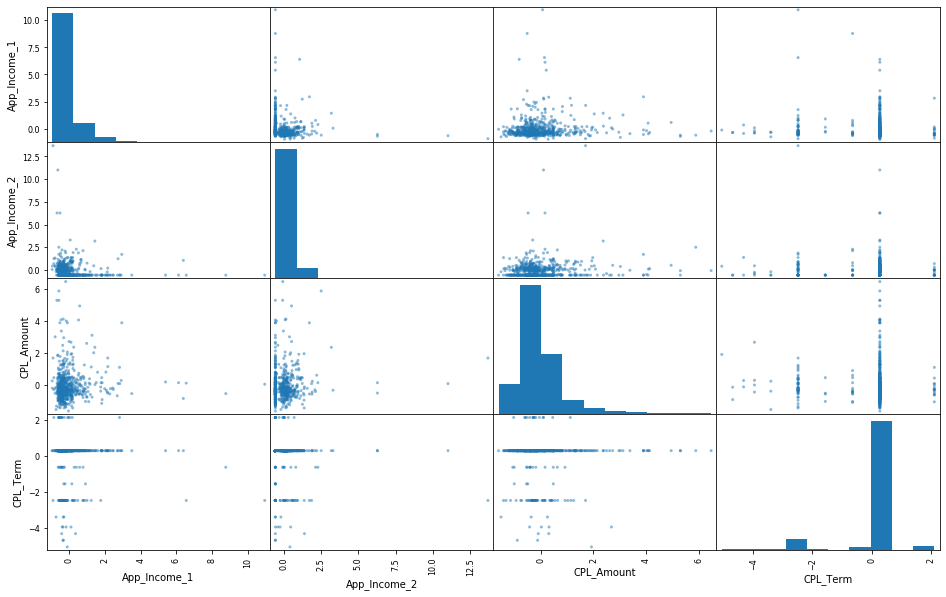

In [26]:
pd.plotting.scatter_matrix(df_train_num, figsize = (16, 10))
plt.show()

### FEATURE ENGINEERING

In [27]:
# Creating two new attributes to generalisze the dataset with a common reference

df_train_fill_median['CPL_Amount_per_term'] = df_train_fill_median['CPL_Amount']/df_train_fill_median['CPL_Term']
df_test_fill_median['CPL_Amount_per_term'] = df_test_fill_median['CPL_Amount']/df_test_fill_median['CPL_Term']

df_train_fill_median['Ratio_income_per_term'] = df_train_fill_median['App_Income_1']/df_train_fill_median['CPL_Amount_per_term']
df_test_fill_median['Ratio_income_per_term'] = df_test_fill_median['App_Income_1']/df_test_fill_median['CPL_Amount_per_term']

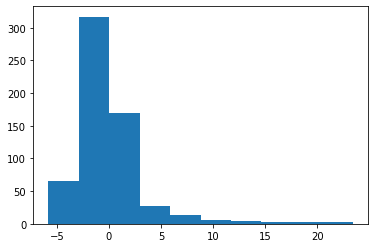

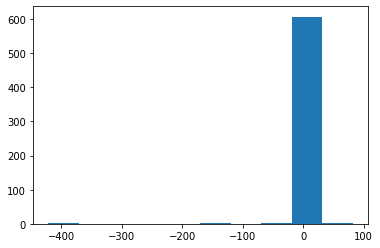

In [28]:
for col in ['CPL_Amount_per_term', 'Ratio_income_per_term']:
    plt.hist(df_train_fill_median[col])
    plt.show()

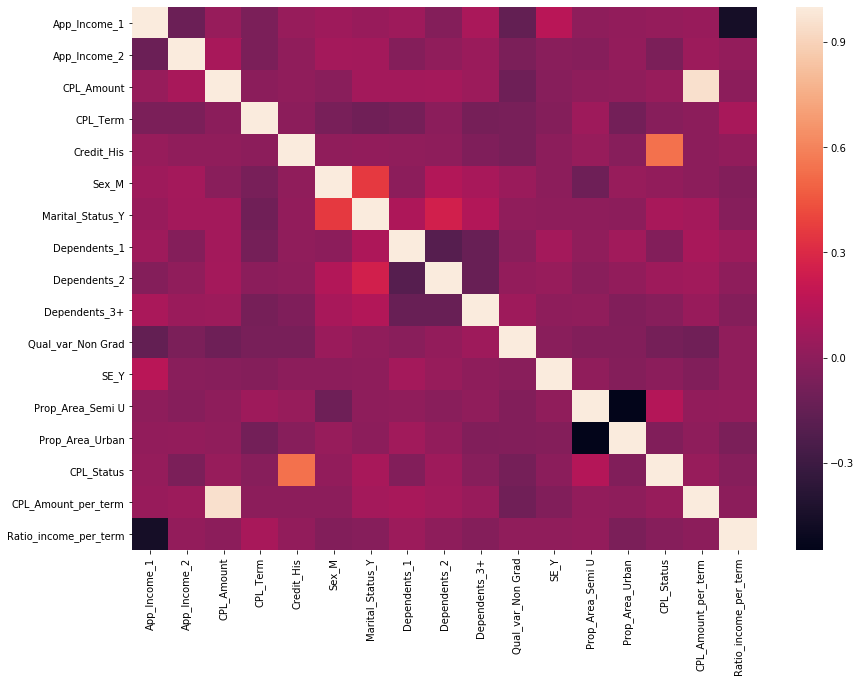

In [29]:
f = plt.subplots(1, 1, figsize = (14,10))
corr = df_train_fill_median.corr()
sns.heatmap(corr)

It's observed that there's a high correlation between Credit History and CPL_Status. This signifies it being a very important feature of our model

### MODELLING

In [30]:
# Train-Test split 80-20

columns = df_train_fill_median.drop('CPL_Status',axis =1).columns
Xtrain, Xtest, y_train, y_test = train_test_split(df_train_fill_median[columns], df_train_fill_median['CPL_Status'], test_size = .2)

In [35]:
# Selecting K-Folds with seed=1 as random state

seed = None

inner_kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
outer_kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

#### Nested K-fold cross validation

In [36]:
def cumlsum_thresh(tup, threshold, sort_vect = False, reverse = True):
    """
    inputs
    __________
    tup: tuple of labels and corresponding values, eg. (label, value)
    threshold: cumulative sum threshold
    sort_vector: should the vector be sorted, default False
    reverse: accending or descending, default True, ie descending
    
    output
    __________
    list of labels where first i values that contribute to the cumulative sum up to threshold
    """
    label, vector = zip(*tup)
    if sort_vect == True:
        vector = sorted(list(vector), reverse=reverse)
    else:
        cuml_sum = 0
        for i, value in enumerate(vector):
            cuml_sum +=value
            if cuml_sum > threshold:
                break
    return list(label[:i])

In [37]:
logit = LogisticRegression()
forest = RandomForestClassifier()
boost = GradientBoostingClassifier()
features = Xtrain.columns

nested_forest_score = np

forest_params = {'max_depth': range(1, 8), 'max_leaf_nodes': range(2, 6)}
boost_params = {'learning_rate': np.arange(.001, 1, .07), 'max_depth': range(1, 8),
                'max_leaf_nodes': range(2, 6)}

clf_forest = GridSearchCV(forest, param_grid=forest_params, scoring='roc_auc', cv=inner_kfold)
clf_boost = GridSearchCV(boost, param_grid=boost_params, scoring='roc_auc', cv=inner_kfold)

#logit feature selection
feat_importance = clf_forest.fit(Xtrain, y_train).best_estimator_.feature_importances_
feat_tup = zip(features, feat_importance)
features_by_importance = sorted(feat_tup, key=lambda x: x[0])
logit_features = cumlsum_thresh(features_by_importance, threshold=.8, reverse=True)
     
nested_forest_score = cross_val_score(estimator=clf_forest, X=Xtrain, y=y_train, cv=outer_kfold, scoring='roc_auc')
nested_boost_score = cross_val_score(estimator=clf_boost, X=Xtrain, y=y_train, cv=outer_kfold, scoring='roc_auc')
nested_logit_score = cross_val_score(estimator=logit, X=Xtrain[logit_features],y=y_train, cv=outer_kfold, 
                                     scoring='roc_auc')
   
print("Random Forest", np.mean(nested_forest_score))
print("Gradient Boosted", np.mean(nested_boost_score))
print("Logit", np.mean(nested_logit_score))   

Random Forest 0.7262122499457174
Gradient Boosted 0.7220850916197004
Logit 0.6999954685774166


#### We see that Random Forest is providing better accuracy

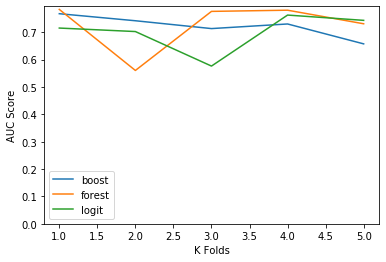

In [38]:
k_fold = range(1,6)

plt.plot(k_fold, nested_boost_score)
plt.plot(k_fold, nested_forest_score)
plt.plot(k_fold, nested_logit_score)
plt.ylim(ymin=0)
plt.xlabel('K Folds')
plt.ylabel('AUC Score')
plt.legend(['boost', 'forest', 'logit'])

### Training the Model

In [39]:
rf = RandomForestClassifier(max_depth = 4, max_leaf_nodes=4).fit(Xtrain, y_train)

accuracy_score(y_train, rf.predict(Xtrain)), accuracy_score(y_test, rf.predict(Xtest))

(0.8081632653061225, 0.8536585365853658)

In [40]:
# The final accuracy score is

roc_auc_score(y_test, rf.predict(Xtest))


0.7631578947368421

In [41]:
df_test_data.head()

,Loanapp_ID,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area
0,CPL001015,M,Y,0,Grad,N,6864.0,0.0,132.0,360.0,1.0,Urban
1,CPL001022,M,Y,1,Grad,N,3691.2,1800.0,151.2,360.0,1.0,Urban
2,CPL001031,M,Y,2,Grad,N,6000.0,2160.0,249.6,360.0,1.0,Urban
3,CPL001035,M,Y,2,Grad,N,2808.0,3055.2,120.0,360.0,1.0,Urban
4,CPL001051,M,N,0,Non Grad,N,3931.2,0.0,93.6,360.0,1.0,Urban


### PREDICTING THE TEST_DATA WITH THE MODEL AND WRITING DOWN THE RESULTS RO RESULTS.XLSX FILE

In [46]:
X_predict = df_test_fill_median

pd_results = pd.DataFrame(rf.predict(X_predict), index = df_test_data['Loanapp_ID'], columns = ['CPL_Status'])
pd_results['CPL_Status'] = pd_results['CPL_Status'].apply(lambda x: 'Approved' if x ==1 else 'Declined')
pd_results.to_excel('Results.xlsx')